## Шаг 1. Изучение исходных данных

In [627]:
# Загружаем все необходимые библиотеки
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import percentile
sns.set(color_codes=True)


In [628]:
#Загружаем таблицы и передаем информации в переменные
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')



In [629]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [630]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [631]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

#### Краткий вывод по таблице звонков:
- call_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
- duration - есть нулевые значения. Необходимо проанализировать сколько их, откуда они, и как их отсеить. 
- пропусков нет, дубликаты определим на слудующем этапе анализа.
---

In [632]:
data_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [633]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [634]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

#### Краткий вывод по таблице трафика:
- session_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
- mb_used - есть нулевые значения. Необходимо проанализировать сколько их, откуда они, и как их отсеить 
- пропусков нет, дубликаты определим на слудующем этапе анализа.
---

In [635]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [636]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Краткий вывод  по таблице сообщений:
- message_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
- пропусков нет, дубликаты определим на слудующем этапе анализа.
---

In [637]:
data_tariffs.head(10)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [638]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Краткий вывод  по таблице тарифов:
По этой таблице вопросов не возникает

In [639]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [640]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Краткий вывод  по таблице пользователей:
- в столбце churn_date есть много пропусков согласно исходному описанию. Пропуски можно заменить индикаторным значением, чтобы их было видно на графиках.
- тип столбца reg_date необходимо преобразовать в datetime

###   Вывод по результатам предварительного изучения данных:
- во всех таблиц с датой call_date  , message_date , sessions_date , reg_date - столбец с информацией о дате имеет тип object, необходимо преобразовать в правильный тип datetime
duration - есть нулевые значения. Необходимо проанализировать сколько их, откуда они, и что с ними делать.
Необговоренных пропусков нет, дубликаты определим на слудующем этапе анализа.
----

 ##  Шаг 2. Предобработка данных

### Поиск дубликатов

In [641]:
#  Проверим дубликаты во всех таблицах 
print('Дубликаты в таблице звонков: {:>8}'.format( data_calls.duplicated().sum()))
print('Дубликаты в таблице трафика: {:>8}'. format(data_internet.duplicated().sum()))
print('Дубликаты в таблице сообщений: {:>6}'. format(data_messages.duplicated().sum()))
print('Дубликаты в таблице пользователей: {:>2}'. format(data_users.duplicated().sum()))


Дубликаты в таблице звонков:        0
Дубликаты в таблице трафика:        0
Дубликаты в таблице сообщений:      0
Дубликаты в таблице пользователей:  0


### Преобразование даты

In [642]:
# Проеобразуем столбец с датами в правильный тип данных
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format ='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format ='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format ='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format ='%Y-%m-%d')


In [643]:
#Проверяем результаты замены 
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [644]:
#Проверяем результаты замены 
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [645]:
#Проверяем результаты замены 
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [646]:
#Проверяем результаты замены 
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### <span style="color:blue">Анализ и отсеивание выбросов значений в столбце звонков "duration" </span>

In [647]:
# Проанализируем количество нулевых значений звонков
print('Количество нулевых звонков: {: >14}'.format(data_calls['duration'][data_calls['duration'] == 0 ].count()))
print('Максимальная длительность: {: >14}'.format(data_calls['duration'].max()))
print('Минимальная ненулевая длительность: {: >5}'.format(data_calls['duration'][data_calls['duration'] != 0 ].min()))

Количество нулевых звонков:          39613
Максимальная длительность:           38.0
Минимальная ненулевая длительность:  0.01


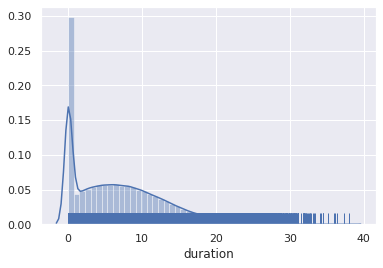

In [648]:
# Распределение значений звонков
sns.distplot(data_calls['duration'], kde=True, rug=True);

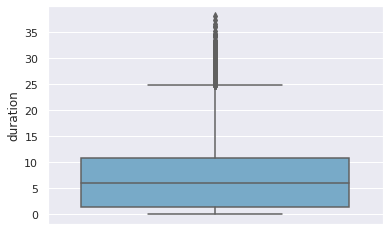

In [649]:
# Рассмотрим значения на графике с усами
sns.boxplot(y = data_calls['duration'] , palette='Blues');

In [650]:
# По нижней границе исключаем значения меньше 25% квартиля. данные записываем в массив
q25 = percentile(data_calls['duration'] , 25)
data_calls = data_calls.loc[data_calls['duration'] >q25]


In [651]:
# Функция определяет выбросы и выводит обработанную таблицу
def outliers_clear(data, column , k):
    q25 , q75 = percentile(data[column] , 25) , percentile(data[column] , 75)
    # Граница выбросов сверху
    upper = q75 + (q75 - q25) * k
    return data[data[column] < upper]

# Функция печати количества выбросов и чистых данных
def outliers_print(data ,column , k):
    print('Количество выбросов при k-факторе {}: {:>16}'. format(k ,len(data[column]) - len(outliers_clear(data, column , k))))
    print('Количество принимаемых значений при k-факторе {}: {}'. format(k ,len(outliers_clear(data ,column , k))))

Количество выбросов при k-факторе 1.5:             1445
Количество принимаемых значений при k-факторе 1.5: 150485


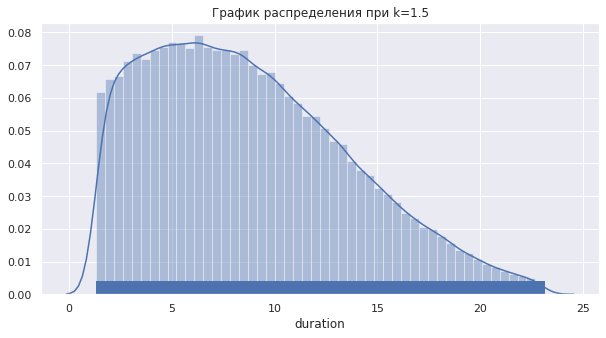

In [652]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 1,5
outliers_print(data_calls , 'duration' , 1.5)
data_calls_clear_1 = outliers_clear(data_calls , 'duration' , 1.5)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=1.5')
sns.distplot(data_calls_clear_1['duration'], kde=True, rug=True);
plt.show()


Количество выбросов при k-факторе 2:              302
Количество принимаемых значений при k-факторе 2: 151628


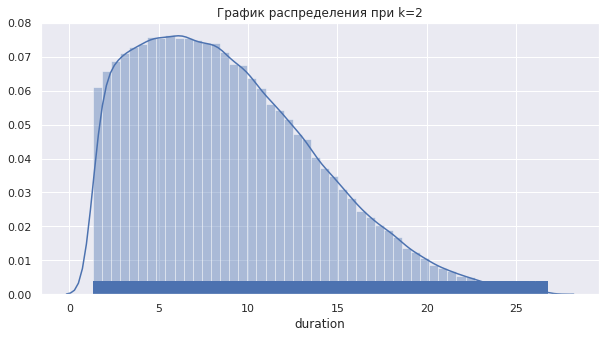

In [653]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 2
outliers_print(data_calls , 'duration' , 2)
data_calls_clear_2 = outliers_clear(data_calls , 'duration' , 2)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=2')
sns.distplot(data_calls_clear_2['duration'], kde=True, rug=True);
plt.show()

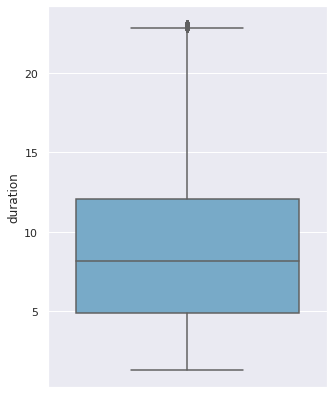

In [654]:
# Boxplot звонков без выбросов
plt.figure(figsize=(5,7))
sns.boxplot(y = data_calls_clear_1['duration'] , palette='Blues');
plt.show()

In [655]:
# Записываем выбранную таблицу в новый датафрейм
data_calls_clear = data_calls_clear_1

### <span style="color:green">Анализ и отсеивание выбросов значений в столбце трафика "mb_used" </span>

In [656]:
# Проанализируем количество нулевых значений трафика
print('Количество сессий с нулевым значением трафика: {: >5}'.format(data_internet['mb_used'][data_internet['mb_used'] == 0 ].count()))
print('Максимальная длительность сессии: {: >20}'.format(data_internet['mb_used'].max()))
print('Минимальная ненулевая длительность сессии: {: >8}'.format(data_internet['mb_used'][data_internet['mb_used'] != 0 ].min()))


Количество сессий с нулевым значением трафика: 19598
Максимальная длительность сессии:              1724.83
Минимальная ненулевая длительность сессии:     0.03


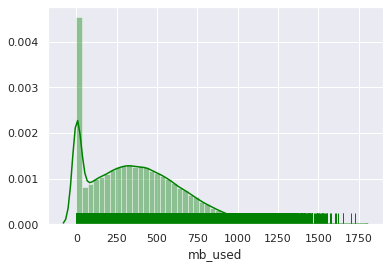

In [657]:
# Распределение значений трафика
sns.distplot(data_internet['mb_used'], kde=True, rug=True, color = 'green' );

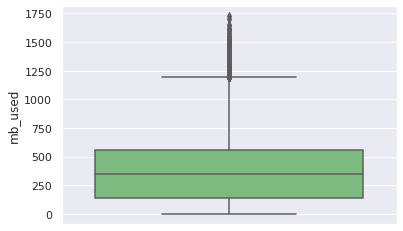

In [658]:
# Рассмотрим значения на графике с усами
sns.boxplot(y = data_internet['mb_used'] , palette='Greens');

In [659]:
# По нижней границе исключаем значения меньше 10МБ. 
print('Значение 1-го квартиля:',percentile(data_internet['mb_used'],25))
data_internet = data_internet.loc[data_internet['mb_used'] >10]

data_internet

Значение 1-го квартиля: 138.1875


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149390,1499_151,752.72,2018-10-11,1499
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149394,1499_155,1246.32,2018-11-26,1499


Количество выбросов при k-факторе 1.5:              880
Количество принимаемых значений при k-факторе 1.5: 127899


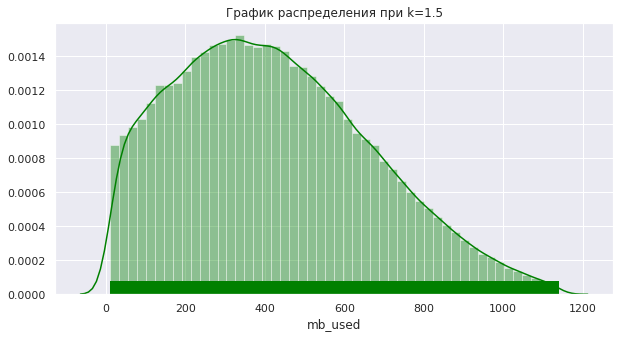

In [660]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 1.5
outliers_print(data_internet , 'mb_used' , 1.5)
data_internet_clear_1= outliers_clear(data_internet , 'mb_used' , 1.5)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=1.5')
sns.distplot(data_internet_clear_1['mb_used'], kde=True, rug=True , color = 'green');
plt.show()

In [ ]:
# Проверим распределение значений с отсеиванием выбросов с коэффициентом 2
outliers_print(data_internet , 'mb_used' ,2)
data_internet_clear_2= outliers_clear(data_internet , 'mb_used' , 2)
plt.figure(figsize = (10,5))
plt.title('График распределения при k=2')
sns.distplot(data_internet_clear_2['mb_used'], kde=True, rug=True , color = 'green');
plt.show()

Количество выбросов при k-факторе 2:              161
Количество принимаемых значений при k-факторе 2: 128618


In [ ]:
# Boxplot трафика без выбросов
plt.figure(figsize=(5,7))
sns.boxplot(y = data_internet_clear_1['mb_used'] , palette='Greens');
plt.show()

In [ ]:
data_internet_clear = data_internet_clear_1

In [ ]:
# Заменим значения индексов в таблице с пользователями
data_users.index = range(1000,1500)
data_users.index

In [ ]:
# Добавляем столбец с месяцем, годом в таблицу с пользователями
# Дата регистрации
data_users['month_reg'] = pd.DatetimeIndex(data_users.loc[:,'reg_date']).month
data_users['year_reg'] = pd.DatetimeIndex(data_users.loc[:,'reg_date']).year

# Дата прекращения тарифа
data_users['month_churn'] = pd.DatetimeIndex(data_users.loc[:,'churn_date']).month
data_users['year_churn'] = pd.DatetimeIndex(data_users.loc[:,'churn_date']).year

data_users.loc[:,'month_churn'] = data_users['month_churn'].fillna(0)
data_users.loc[:,'month_reg'] = data_users['month_reg'].fillna(0)


In [ ]:
# Добавляем всех, кто не пользовался услугами, но был подключен к тарифу
def func_add_zero(data_pivot , data_user): # data_pivot - сводная таблица, 
                                     #  data_user - таблица с пользователями, 
                                                    #которые подключены к тарифу но ничего с ним не делали
    for index in data_user.index:
        month_reg =  data_user.loc[index , 'month_reg']
        month_churn = data_user.loc[index , 'month_churn']
    # Проверяем когда пользователь прекратил пользоваться тарифом
        n = 13 if month_churn ==0  else month_churn+1 if month_churn==month_reg else month_churn         
        for m in range(month_reg , int(n)):
        #Записываем в таблицу нулевые значения количества сообщений, когда пользователь был подключен к тарифу
            data_pivot.loc[(index , m), :] = 0
    return data_pivot.sort_values(by = 'user_id')

In [ ]:
# Добавляем месяца пользования тарифом, когда услугами не пользовался, но был подключен к тарифу
def func_add_month(data):
    for index in data_users.index:
        month_data = data.loc[index].index.min()
        if month_data > data_users.loc[index , 'month_reg']:
            m = int(data_users.loc[index, 'month_reg'])
            n = month_data
            for i in range(m , n):
                data.loc[(index , i), :] = 0
    return data.sort_values(by = 'user_id')

In [ ]:
data_users.loc[1091]
data_calls_pivot_sum_count.loc[1092]

In [ ]:
data_calls_pivot_sum_count = func_add_zero(data_calls_pivot_sum_count , data_users_no_call)
for index in data_users.index:
        month_data = data_calls_pivot_sum_count.loc[index].index.min()
        if month_data > data_users.loc[index , 'month_reg']:
            m = int(data_users.loc[index, 'month_reg'])
            n = month_data
            for i in range(m , n):
                data_calls_pivot_sum_count.loc[(index , i), :] = 0
    
data_calls_pivot_sum_count.

### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам

In [ ]:
# Добавляем столбец с месяцем, годом
data_calls_clear.loc[:,'month'] = pd.DatetimeIndex(data_calls_clear['call_date']).month
data_calls_clear.loc[:,'year'] = pd.DatetimeIndex(data_calls_clear['call_date']).year

data_calls_clear.head(5)
# Округляем значение  длительностей звонков
data_calls_clear.loc[:,'duration'] = data_calls_clear['duration'].apply(np.ceil)
data_calls_clear

In [ ]:
# Проверим все ли пользователи делали звонки
print('Всего звонивших в отсортированных данных:' , len(data_calls_clear['user_id'].unique()))
print('Всего звонивших в исходной таблице:' , len(data_calls['user_id'].unique()))


In [ ]:
print('Список пользователей, которые не звонили')
data_users_no_call = data_users[~data_users['user_id'].isin(data_calls_clear.groupby('user_id').count().index)]
data_users_no_call

In [ ]:
# Сводная таблица суммы длительности звонков по каждому пользователю
data_calls_pivot_sum_count= data_calls_clear.pivot_table(
                                index = ['user_id','month'] ,                        
                                values = 'duration' ,
                                aggfunc = ['sum', 'count'])

# Заменяем названия столбцов
data_calls_pivot_sum_count.columns =['calls_sum' , 'calls_count']

In [ ]:
# Добавляем всех, кто не звонил, но пользовался тарифом
data_calls_pivot_sum_count = func_add_zero(data_calls_pivot_sum_count , data_users_no_call)
data_calls_pivot_sum_count

In [ ]:
data_calls_pivot_sum_count.loc[1373]

### Расчет количества отправленных сообщений по месяцам

In [ ]:
# Добавляем столбец с месяцем, годом
data_messages.loc[:,'month'] = pd.DatetimeIndex(data_messages.loc[:,'message_date']).month
data_messages.loc[:,'year'] = pd.DatetimeIndex(data_messages.loc[:,'message_date']).year

data_messages.head(5)

In [ ]:
# Сводная таблица количества сообщений по каждому пользователю
data_messages_pivot_count = data_messages.pivot_table(
                                index = ['user_id','month'] ,
                                values = 'id' ,
                                aggfunc = 'count')
# Заменяем пропуски нулями
data_messages_pivot_count[data_messages_pivot_count.isnull()] = 0

# Заменяем названия столбцов
data_messages_pivot_count.columns = ['messages_count']

data_messages_pivot_count

In [ ]:
# Проверим все ли пользователи отправляли сообщения
print('Всего отправлявших сообщения в исходной таблице:' , len(data_messages['user_id'].unique()))

In [ ]:
print('Список пользователей, которые не отправляли сообщения')
data_users_no_sms = data_users[~data_users['user_id'].isin(data_messages.groupby('user_id').count().index)]
data_users_no_sms

In [ ]:
# Добавляем всех, кто не отправлял сообщения, но был подключен к тарифу
data_calls_pivot_sum_count = func_add_zero(data_messages_pivot_count , data_users_no_sms)
data_calls_pivot_sum_count

### Расчет объема израсходованного интернет-трафика по месяцам

In [ ]:
# Добавляем столбец с месяцем, годом
data_internet_clear.loc[:,'month'] = pd.DatetimeIndex(data_internet_clear['session_date']).month
data_internet_clear.loc[:,'year'] = pd.DatetimeIndex(data_internet_clear['session_date']).year

data_internet_clear.head(5)

# Округляем значение трафика и приводим к целым числам
data_internet_clear.loc[:,'mb_used'] = data_internet_clear['mb_used'].apply(np.ceil)
data_internet_clear

In [ ]:
# Сводная таблица суммы трафика по каждому пользователю
data_internet_clear_pivot_sum = data_internet_clear.pivot_table(
                                index = ['user_id','month'] ,
                                values = 'mb_used' ,
                                aggfunc = 'sum')

# Заменяем названия столбцов
data_internet_clear_pivot_sum.columns = ['mb_used_sum']
data_internet_clear_pivot_sum


In [ ]:
# Проверим все ли пользователи выходили в инет
print('Всего выходивших в инет в отсортированных данных:' , len(data_internet_clear['user_id'].unique()))
print('Всего выходивших в инет в исходной таблице:' , len(data_internet['user_id'].unique()))

In [ ]:
print('Список пользователей, которые не выходили в инет')
data_users_no_trafik = data_users[~data_users['user_id'].isin(data_internet_clear.groupby('user_id').count().index)]
data_users_no_trafik

In [ ]:
# Добавляем всех, кто не пользовался интернетом, но был подключен к тарифу
data_calls_pivot_sum_count = func_add_zero(data_internet_clear_pivot_sum , data_users_no_trafik)
data_calls_pivot_sum_count

### Расчет помесячной выручки с каждого пользователя

In [ ]:
#Объединяем сводные таблицы в одну
data_pivot_total = pd.concat([data_calls_pivot_sum_count , 
           data_messages_pivot_count,
           data_internet_clear_pivot_sum],axis=1)
data_pivot_total


In [ ]:
# Добавляем месяца, когда пользователи не пользовались услугами, но были подключены к тарифу
for index in data_pivot_total.index:
    month_data = index[1]  # Значение месяца из мультииндекса сводной таблицы
    month_reg = data_users.loc[index[0] , 'month_reg']       # Значение месяца регистрации пользователя
    for i in range(month_reg , 13):
        if i != month_data: 
            data_pivot_total.loc[(index[0] , i), :] = 0
    
data_pivot_total

In [ ]:
data_pivot_total.loc[(1601 , 6), :] =0
data_pivot_total

In [ ]:
# Проверим пропуски и нули в таблице
data_pivot_total.isna().sum()

In [ ]:
# Заполняем пропуски нулями 
data_pivot_total = data_pivot_total.fillna(0)
data_pivot_total.isna().sum()

In [ ]:
# Считаем выручку для каждого пользователя без учета абонентской платы
# Копируем датафрейм, чтобы в нем менять значения 
# Приводим все к целым числам
data_pivot_revenue = data_pivot_total.copy(deep=True).drop('calls_count',1).astype(int)
data_pivot_revenue

In [ ]:
for index in data_pivot_revenue.index:                                                       
   # Присваиваем индекс тарифа пользователя index[0]
    tariff_index = 0 if data_users.loc[index[0] , 'tariff']=='smart' else 1 
    #  В новый столбец записываем ежемесясную абонентскую плату
    data_pivot_revenue.loc[index , 'rub_monthly_fee'] = data_tariffs.loc[tariff_index , 'rub_monthly_fee']  
   # В переменные записываем информацию о тарифе
    rub_per_call = data_tariffs.loc[tariff_index , 'rub_per_minute']
    rub_per_mess = data_tariffs.loc[tariff_index , 'rub_per_message']
    rub_per_mb =   data_tariffs.loc[tariff_index , 'rub_per_gb']/1024
   # Проверяем сколько израсходовано минут. Если меньше того . что есть в тарифе, то ставим 0. 
   # Если больше, то разность умножаем на стоимость минуты
    if (data_pivot_revenue.loc[index , 'calls_sum'] < data_tariffs.loc[tariff_index,'minutes_included']):
        data_pivot_revenue.loc[index , 'calls_sum'] =0        
    else:
        data_pivot_revenue.loc[index , 'calls_sum'] = (data_pivot_revenue.loc[index , 'calls_sum']
                                                       - data_tariffs.loc[tariff_index,'minutes_included'])*rub_per_call
   # Проверяем сколько израсходовано сообщений. Если меньше того . что есть в тарифе, то ставим 0. 
   # Если больше, то разность умножаем на стоимость сообщения 
    if (data_pivot_revenue.loc[index , 'messages_count'] < data_tariffs.loc[tariff_index,'messages_included']):
        data_pivot_revenue.loc[index , 'messages_count'] =0        
    else:
        data_pivot_revenue.loc[index , 'messages_count'] = (data_pivot_revenue.loc[index , 'messages_count']
                                                       - data_tariffs.loc[tariff_index,'messages_included'])*rub_per_mess
   # Проверяем сколько израсходовано трафика. Если меньше того . что есть в тарифе, то ставим 0. 
   # Если больше, то разность умножаем на стоимость одного Мб 
    if (data_pivot_revenue.loc[index , 'mb_used_sum'] < data_tariffs.loc[tariff_index,'mg_per_month_included']):
        data_pivot_revenue.loc[index , 'mb_used_sum'] =0        
    else:
        data_pivot_revenue.loc[index , 'mb_used_sum'] = (data_pivot_revenue.loc[index , 'mb_used_sum']
                                                       - data_tariffs.loc[tariff_index,'mg_per_month_included'])*rub_per_mb

data_pivot_revenue        

In [ ]:
# В таблицу добавляем столбец с общей выручкой от пользователя в месяц
data_pivot_revenue['user_revenue'] = data_pivot_revenue.sum(axis=1)
data_pivot_revenue

In [ ]:
data_pivot_revenue.pivot_table(index = 'user_id' ,
                                values = 'user_revenue' ,
                                aggfunc = 'mean')

###   Вывод по результатам предобработки данных:
- поиск дубликатов. По всем таблица, кроме таблицы с тарифами, были проверены дубликаты значений методом duplicated(). Дубликатов обнаружено не было.
- преобразование даты. Методом to_datetime() во всех столбцах были преобразованы значения даты в тип datetime для удобства дальнейшей работы с датой. В таблицах произведена замена значений в столбце с датой.
- выбросы в столбце "duration" таблицы со звонками. При анализе распределения значений столбца "duration" были обнаружено большое количество нулевых значений, которые могут сильно исказить данные. Распределение значений не является нормальным, поэтому выбросы определяем квартилями. Нижнюю границу выбросов определяем значением 1-го квартиля, который равен 1.3, что можно рассматривать как короткий звонок, а не ошибку. На графике boxplot видно, что за 3-м квартилем также есть выбросы. Границу выбросов определяем прибавляя 1,5 межквартильного размаха к значению 3-го межквартильного размаха, т.е. 
                            Qверх.выбр = Q3 + 1.5*(Q3 - Q1) 
Были проверены выбросы с учетом 2-х межквартильных размахов, но отличия распределений незначительное.
Построение графика boxplot по преобразованным данным показывает отсутствие выбросов. Таблицу сохраняем в новую переменную data_calls_clear.
-  выбросы в столбце "mb_used" таблицы с трафиком. При анализе распределения значений столбца "mb_used" также были обнаружено большое количество нулевых значений. Распределение значений не является нормальным, поэтому выбросы определяем квартилями. Значение 1-го квартиля составляет 138Мб. Расчет левой границы выбросов по формуле:
                             Qниж.выбр = Q1 - 1.5*(Q3 - Q1)
невозможен, т.к. получается отрицательное значение, поэтому принимаем нижнюю границу выбросов равной 10 Мб, что субъективно является реальным трафиком. 
Верхнюю границу рассчитываем аналогично - прибавляем 1,5 межквартильного размаха к значению 3-го межквартильного размаха.
Построение графика boxplot по преобразованным данным показывает отсутствие выбросов. Таблицу сохраняем в новую переменную data_internet_clear.
- для удобства работы с таблицей с пользователями индексы заменим соответсвущими значениями столбца user_id.
- обработка таблицы data_users.  Для анализа даты регистрации пользователя добавляем столбцы с месяцем/ годом регистрации и месяцем/ годом  прекращения тарифа.
----

###   Вывод по результатам  расчетов выручки:
 #### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам.
Для расчета количества звонков и минут по месяцам используем таблицу, очищенную от выбросов. Создаем в таблице столбец с месяцем и годом. Это нужно для последующей сортировки по месяцу. Т.к. звонок считается совершенным если он более 1 сек, то методом apply(np.ceil) округляем все значения до большего целого. 
Методом pivot_table() создаем сводную таблицу с мультииндексом, первой частью которого является id пользователя, а второй часть номер месяца. При анализе таблице видно, что 8 пользователей не делали звонков. Сравнивая этих пользователей с исходной таблице определяем, что при исключении выбросов отдельные пользователи не были исключены.
Для дальнейшей возможности обращения к столбцам таблицы методом columns заменяем название столбцов на calls_sum - сумма звонков по минутам, и calls_count - количество звонков.

 
 #### Расчет количества отправленных сообщений по месяцам
Для расчета количества сообщений по месяцам используем исходную таблицу. Создаем с таблице столбец с месяцем и годом. Это нужно для последующей сортировки по месяцу.
Методом pivot_table() создаем сводную таблицу с мультииндексом, первой частью которого является id пользователя, а второй часть номер месяца. При анализе таблице видно, что 74 пользователей не отправляли сообщений. 
Для дальнейшей возможности обращения к столбцам таблицы методом columns заменяем название столбцов на messages_count - количество отправленных сообщений.

#### Расчет объема израсходованного интернет-трафика по месяцам
Для расчета объема израсходованного интернет-трафика по месяцам используем таблицу, очищенную от выбросов. Создаем в таблице столбец с месяцем и годом. Это нужно для последующей сортировки по месяцу.
Методом pivot_table() создаем сводную таблицу с мультииндексом, первой частью которого является id пользователя, а второй часть номер месяца. При анализе таблице видно, что 3 пользователя не пользовались интернетом. Сравнивая этих пользователей с исходной таблице определяем, что при исключении выбросов отдельные пользователи не были исключены.
Для дальнейшей возможности обращения к столбцам таблицы методом columns заменяем название столбцов на mb_used_sum - количество потраченных Мб трафика. 
 
 #### Расчет помесячной выручки с каждого пользователя
 
 

 ##  Шаг 3. Анализ данных

In [ ]:
data_pivot_revenue.pivot_table(index = 'user_id' ,
                                values = 'user_revenue' ,
                                aggfunc = 'mean')

###   Вывод по результатам предварительного изучения данных:
----

##  Шаг 4. Проверка гипотез

###   Вывод по результатам проверки гипотез:
----

##  Шаг 5. Общий вывод